<a href="https://colab.research.google.com/github/MehdiSamadieh/Import-and-export-in-python/blob/master/LogesticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# New Section 
Logestic Regression

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np

In [5]:
from google.colab import files

uploaded = files.upload()

Saving Scaled Features Selected.csv to Scaled Features Selected.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Scaled Features Selected.csv" with length 10938 bytes


In [7]:
raw_data = pd.read_csv("Scaled Features Selected.csv")
raw_data.head(10)

,x1,x2,x3,x4,y
0,1,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,1
5,0,0,1,0,1
6,0,0,1,0,1
7,0,0,1,0,0
8,0,0,1,0,1
9,0,1,0,0,1


DATA 

In [9]:
df = pd.DataFrame(raw_data,columns=['x1','x2','x3','y'])

print (df)

     x1  x2  x3  y
0     1   0   0  1
1     0   0   0  0
2     0   0   0  0
3     0   0   1  0
4     0   0   1  1
5     0   0   1  1
6     0   0   1  1
7     0   0   1  0
8     0   0   1  1
9     0   1   0  1
10    0   0   0  1
11    0   0   1  1
12    0   0   1  0
13    0   0   0  1
14    0   0   0  1
15    1   0   0  1
16    0   0   1  1
17    0   0   0  0
18    0   1   0  1
19    0   0   0  0
20    0   0   1  1
21    1   0   0  1
22    0   0   1  1
23    0   1   0  1
24    0   1   0  1
25    0   0   1  0
26    0   0   1  1
27    0   0   1  0
28    0   0   1  0
29    0   0   0  0
..   ..  ..  .. ..
963   0   1   0  0
964   0   1   0  1
965   0   1   0  1
966   0   1   0  1
967   0   1   0  1
968   0   1   0  0
969   0   0   0  0
970   0   1   0  1
971   0   0   1  0
972   1   0   0  1
973   0   0   0  1
974   0   1   0  1
975   0   1   0  0
976   0   0   0  0
977   0   1   0  1
978   0   0   0  0
979   0   1   0  1
980   0   0   0  1
981   0   1   0  1
982   0   1   0  1
983   0   1 

In [0]:
col_names = ['x1', 'x2', 'x3', 'x4', 'lable']
# load dataset
pima = pd.read_csv("Scaled Features Selected.csv", header=None, names=col_names)

In [0]:
pima.head(13)


,x1,x2,x3,x4,lable
0,x1,x2,x3,x4,y
1,1,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,0
5,0,0,1,0,1
6,0,0,1,0,1
7,0,0,1,0,1
8,0,0,1,0,0
9,0,0,1,0,1


In [0]:
feature_cols = ['x1', 'x2','x3']
X = df[feature_cols] # Features
y = df.y # Target variable
#print(y)

In [0]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  45],
       [ 13,  79]])

Text(0.5, 257.44, 'Predicted label')

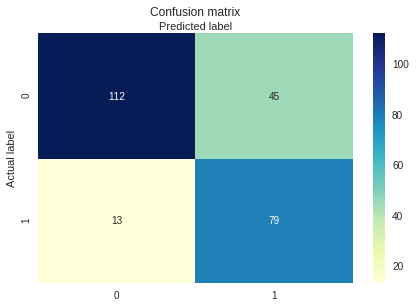

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7670682730923695
Precision: 0.6370967741935484
Recall: 0.8586956521739131


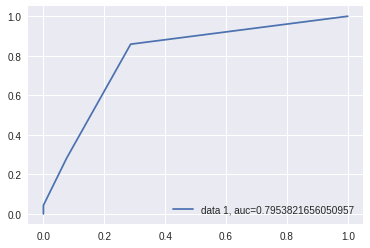

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()